# # Project: Investigate "No-show appointments" Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: In this project, I intend to invistigate "No-show appointments" dataset. This dataset collects information from 100k medical appointments in Brazil, and containing multiple features illustrated below: 
<li>PatientId: Patient file number.</li> 
<li>AppointmentID: Id of sceduled appointment.</li>
<li>Gender: F for female, and M for male.</li>
<li>ScheduledDay: The day patients book their appointments.</li>
<li>AppointmentDay: Appointment date.</li> 
<li>Age: Patient age vary from 0 to 115 years.</li>
<li>Neighbourhood: Indicates the location of hospital.</li>
<li>Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program. It's a binary feature where 0 means patient has no scholarship and 1 means the opposite.</li>
<li>Hipertension: Indicates whether or not the patient has Hipertension.</li>
<li>Diabetes: Indicates whether or not the patient has Diabetes.</li>
<li>Alcoholism: Indicates whether or not the patient diagnosed with alcoholism.</li>
<li>Handcap: Binary label in which 0 means patient has no handcap and 1 otherwise.</li>
<li>SMS_received: Binary label in which 0 means patient doesn't receive SMS for the appointment and 1 if the patient receive the SMS.</li>
<li>No-show: Containing two values "Yes" if the patient miss the appointment and "No" if the patient has attend the appointment.</li>

The analysis of this data is based on which patients are more likely to attend their appointments.
> **Question**: What are the factors that affecting the attendance of patients?
> 

First, import packages for manipulating data and visulization

In [159]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [160]:
#Load data as csv file
df = pd.read_csv('noshowappointments-may-2016.csv', engine='python')
#print first five records
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


After loading the data, we want to take a quick look on the features, values count of each feature and their datatypes.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


The most common problem in collected data is missing values. So, below cell is to check whether the data has any missing values.

In [162]:
#check for any null values
df.isnull().sum().any()


False

After that, we will check for duplicated records.

In [163]:
#check for duplicated rows
df.duplicated().sum()

0

Check the number of unique values in each column

In [164]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Now, let's check the value in each column.

In [165]:
#check the values in "Age" column
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [166]:
#Check values of Scholarship column
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [167]:
#Check values of handcap column
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [168]:
#Check values of SMS_ column
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

### Now that we have done data wrangling, several observations are found which listed below:

<li>There are no missing or duplicated values in this data</li>
<li>For consistency, 'No-show' column should be renamed to be 'No_show'</li>
<li>In 'Age' column, we found outlier value (-1)</li>
<li>In 'Handcap' which is considered as a binary column, there are outliers values (2,3,4) </li>

### Data Cleaning (cleaning columns and handling outliers)

Before start cleaning the data, let's first drop the columns that we are not interested in.

In [169]:
#drop column that will not be used
labels = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Neighbourhood','Hipertension','Diabetes','Alcoholism']
for l in labels:
    df.drop(l, axis=1, inplace=True)
df.head(1)

,Age,Scholarship,Handcap,SMS_received,No-show
0,62,0,0,0,No


1- Rename 'No-show' column

In [170]:
#rename no show column to No_show
df.rename(columns = {'No-show' : 'No_show'}, inplace =True)
df.head(1)

,Age,Scholarship,Handcap,SMS_received,No_show
0,62,0,0,0,No


In [171]:
#check the tuple of data after dropping columns
df.shape

(110527, 5)

2- Remove outlier value (-1) from 'Age' column. Since it's only one row, we can just drop the row with outlier value.

In [172]:
#Find the row index of value (-1)
out = df.index[df['Age'] == -1].tolist()
out

[99832]

In [173]:
#Removing outlier using its index
df.drop(axis=0,index = out, inplace=True)

In [174]:
#check if the value (-1) is removed
df.index[df['Age'] == -1].tolist()

[]

3- Remove values (2,3,4) from 'Handcap' column

In [175]:
#Retrieving indices of outlier values
out_hand = [2,3,4]
ind=[]
for n in out_hand:
    ind.append(df.index[df['Handcap'] == n ].tolist())
    
ind   

[[946,
  1665,
  1666,
  2071,
  2091,
  2213,
  2673,
  5424,
  5467,
  5475,
  5485,
  5510,
  6067,
  6156,
  6401,
  11227,
  11230,
  14847,
  15839,
  15845,
  16632,
  16634,
  16635,
  16636,
  17862,
  18241,
  19264,
  19915,
  19981,
  19987,
  20695,
  20805,
  22003,
  22051,
  22093,
  22163,
  22167,
  23085,
  23616,
  23720,
  24143,
  25975,
  26686,
  26728,
  27225,
  27284,
  28518,
  28854,
  28967,
  30168,
  30221,
  30356,
  32416,
  32692,
  32745,
  34742,
  34797,
  34900,
  35108,
  36070,
  36698,
  40252,
  41494,
  41696,
  41697,
  41698,
  41699,
  41984,
  41995,
  42969,
  42978,
  42987,
  44364,
  46395,
  46581,
  46583,
  46624,
  46665,
  47344,
  47477,
  48437,
  48849,
  48961,
  49724,
  52207,
  52977,
  52978,
  55161,
  55772,
  55812,
  57646,
  58422,
  59205,
  59403,
  60636,
  60647,
  60849,
  60851,
  60855,
  60858,
  61046,
  61063,
  61314,
  65573,
  65907,
  66043,
  68228,
  69239,
  69278,
  69312,
  69918,
  69934,
  69979,

In [176]:
#Saving multidimentional array using np.array
ind1 = np.array(ind)


<ipython-input-176-a798889ce69d>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ind1 = np.array(ind)


In [177]:
#function to remove outlier values from Handcap col.
def remov_out(x):
    df.drop(axis=0,index = x, inplace=True)
    return df

In [178]:
#Removing outlier (2) using its index in the array
remov_out(ind1[0])

,Age,Scholarship,Handcap,SMS_received,No_show
0,62,0,0,0,No
1,56,0,0,0,No
2,62,0,0,0,No
3,8,0,0,0,No
4,56,0,0,0,No
...,...,...,...,...,...
110522,56,0,0,1,No
110523,51,0,0,1,No
110524,21,0,0,1,No
110525,38,0,0,1,No


In [179]:
#Removing outlier (3) using its index in the array
remov_out(ind1[1])

,Age,Scholarship,Handcap,SMS_received,No_show
0,62,0,0,0,No
1,56,0,0,0,No
2,62,0,0,0,No
3,8,0,0,0,No
4,56,0,0,0,No
...,...,...,...,...,...
110522,56,0,0,1,No
110523,51,0,0,1,No
110524,21,0,0,1,No
110525,38,0,0,1,No


In [180]:
#Removing outlier (4) using its index in the array
remov_out(ind1[2])

,Age,Scholarship,Handcap,SMS_received,No_show
0,62,0,0,0,No
1,56,0,0,0,No
2,62,0,0,0,No
3,8,0,0,0,No
4,56,0,0,0,No
...,...,...,...,...,...
110522,56,0,0,1,No
110523,51,0,0,1,No
110524,21,0,0,1,No
110525,38,0,0,1,No


In [181]:
#Check 'Handcap' values after removing the outliers
df.Handcap.value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

In [182]:
#Save the updated file 
df.to_csv('Updated_appointments_Noshow11.csv')

Check data tuple after cleaning the data

In [183]:
df.shape

(110327, 5)

<a id='eda'></a>
## Exploratory Data Analysis


### What major factors that are affecting the attendance of the patients?

**Data Filtering**

In data filtering, we will seperate no show patients from other patients in order to assess each group with other variable seperately.

In [184]:
#Selecting records with "Yes" value in No_show column
df_yes = df.query('No_show == "Yes"')

In [185]:
#Selecting "No" records for No_show
df_no = df.query('No_show == "No"')

**Exploring Data**

In this section, we will check the association of each independent variables(Age, Scholarship, Handcap, SMS_received) with the dependent variable (No_show)

Age:

Use Scatter graph to see the ages of patient who attend and those who skip their appointments.

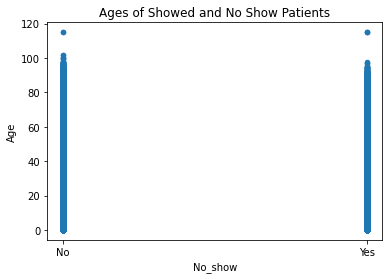

In [186]:
df.plot(x='No_show', y='Age', kind='scatter');
plt.title('Ages of Showed and No Show Patients');

See the distribution of ages for patients who showed and those who skipped their appointments.

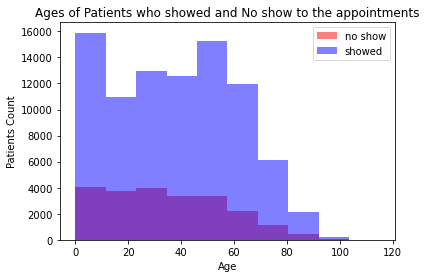

In [187]:
plt.hist(df_yes.Age, facecolor='r', alpha=0.5,label='no show');
plt.hist(df_no.Age, facecolor='b', alpha=0.5,label='showed');
plt.xlabel('Age')
plt.ylabel('Patients Count')
plt.title('Ages of Patients who showed and No show to the appointments')
plt.legend();

Scholarship:

Check the scholarship status of "no show" patients

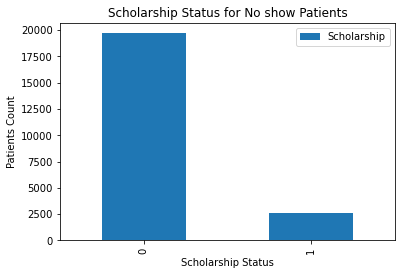

In [188]:
df_yes.Scholarship.value_counts().plot(kind='bar');
plt.xlabel('Scholarship Status')
plt.ylabel('Patients Count')
plt.title('Scholarship Status for No show Patients')
plt.legend();

Check the scholarship status of "showed" patients.

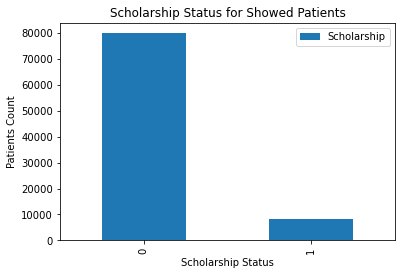

In [189]:
df_no.Scholarship.value_counts().plot(kind='bar');
plt.xlabel('Scholarship Status')
plt.ylabel('Patients Count')
plt.title('Scholarship Status for Showed Patients')
plt.legend();

Now let's combine both groups (Showed and no show) in order to compare the attendance based on the scholarship.

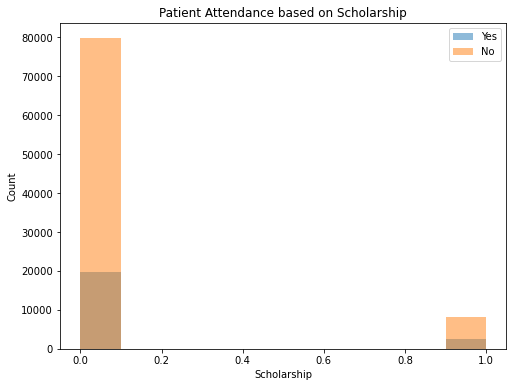

In [190]:
#Visualize attaendance of patients based on whether or not patient has a scholarship
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_yes.Scholarship, alpha = 0.5 ,label= 'Yes')
ax.hist(df_no.Scholarship, alpha = 0.5, label= 'No')
ax.set_title('Patient Attendance based on Scholarship')
ax.set_xlabel('Scholarship')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

Handcap:

In below chart, we combine both groups (Showed and no show patients) to compare their attendance based on the handicap condition.

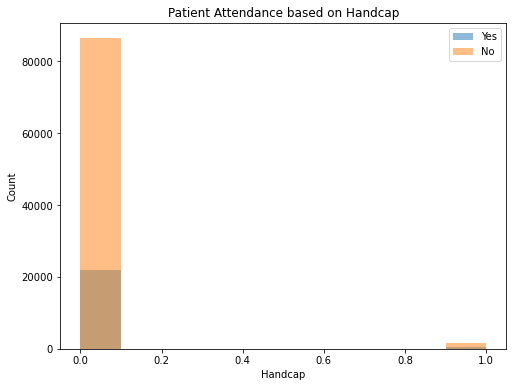

In [191]:
#Visualize attaendance of patients with handicap
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_yes.Handcap, alpha = 0.5 ,label= 'Yes')
ax.hist(df_no.Handcap, alpha = 0.5, label= 'No')
ax.set_title('Patient Attendance based on Handcap')
ax.set_xlabel('Handcap')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

SMS_recieved:

Below char is represent the relationship between patient attendance and whether they receiving SMS regarding the appointment.

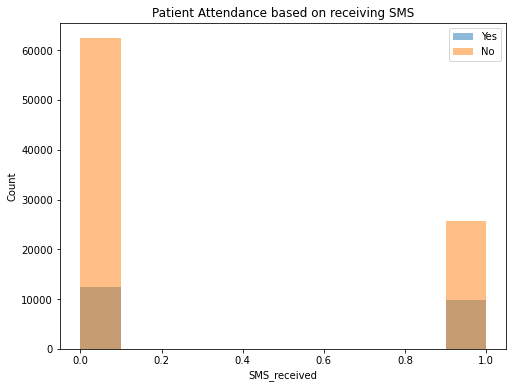

In [192]:
#Visualize attaendance of patients based on whether patient received an SMS
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_yes.SMS_received, alpha = 0.5 ,label= 'Yes')
ax.hist(df_no.SMS_received, alpha = 0.5, label= 'No')
ax.set_title('Patient Attendance based on receiving SMS')
ax.set_xlabel('SMS_received')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()